In [1]:
import retinanalysis as ra
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

[2025-07-14 16:00:40,828][INFO]: DataJoint 0.14.4 connected to root@127.0.0.1:3306


## Step 1: Query protocol across all experiments

In [2]:
protocols_to_query = ['movingletters', 'presentmatfiles']
experiment_query = ra.get_datasets_from_protocol_names(protocols_to_query)
display(experiment_query)


Found 1 protocols matching "movingletters":
['edu.washington.riekelab.protocols.MovingLetters']

Found 1 protocols matching "presentmatfiles":
['edu.washington.riekelab.protocols.PresentMatFiles']

Found 4 experiments, 6 epoch blocks.



,exp_name,datafile_name,NDF,chunk_name,protocol_name,is_mea,data_dir,group_label,experiment_id,protocol_id,group_id,block_id,chunk_id
0,20250429C,data007,0.5,moving_letters,edu.washington.riekelab.protocols.MovingLetters,1,20250429C/data007,DR moving letters,122,67,2250,3265,476
1,20250429C,data009,0.5,moving_letters,edu.washington.riekelab.protocols.MovingLetters,1,20250429C/data009,DR moving letters,122,67,2252,3267,476
2,20250514C,data003,0.5,movies_images,edu.washington.riekelab.protocols.PresentMatFiles,1,20250514C/data003,PresentMatFiles,124,68,2277,3298,488
3,20250514C,data015,0.5,moving_letters,edu.washington.riekelab.protocols.MovingLetters,1,20250514C/data015,DR Moving Letters,124,67,2289,3310,490
4,20250527C,data010,0.5,moving_letters,edu.washington.riekelab.protocols.MovingLetters,1,20250527C/data010,Moving E,125,67,2299,3322,497
5,20250530C,data002,0.5,moving_letters,edu.washington.riekelab.protocols.MovingLetters,1,20250530C/data002,Moving Letters,127,67,2316,3340,510


## Select experiment and data file of interest

In [3]:
exp_name = experiment_query.loc[2, 'exp_name']
datafile_name = experiment_query.loc[2,'datafile_name']
pipeline=ra.create_pipeline(exp_name, datafile_name)
stim = pipeline.stim_block
response = pipeline.response_block
analysis = pipeline.analysis_chunk

Nearest noise chunk for data003 is chunk1 with distance 20 minutes.

Loading VCD from /Volumes/ExternalM2/mea_ssd/data/sorted/20250514C/data003/kilosort2.5 ...
VCD loaded with 884 cells.
Using chunk1 for AnalysisChunk
Loading VCD from /Volumes/ExternalM2/mea_ssd/analysis/20250514C/chunk1/kilosort2.5 ...
VCD loaded with 781 cells.
Loaded spatial maps for channels [0, 2] and 781 cells of shape (127, 203, 2)
Spatial maps have been padded to align with RF parameters.

Ref clusters matched: 501
Ref clusters unmatched: 280
64.15% matched, 35.85% unmatched.


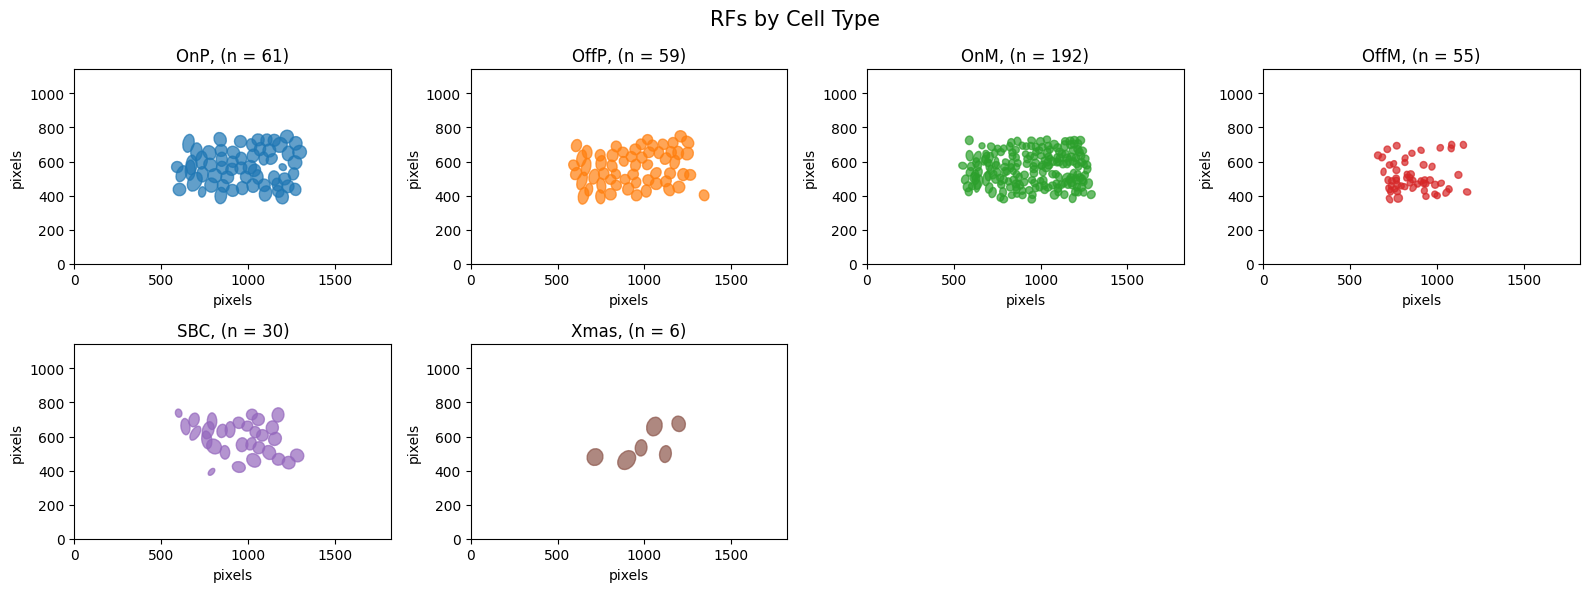

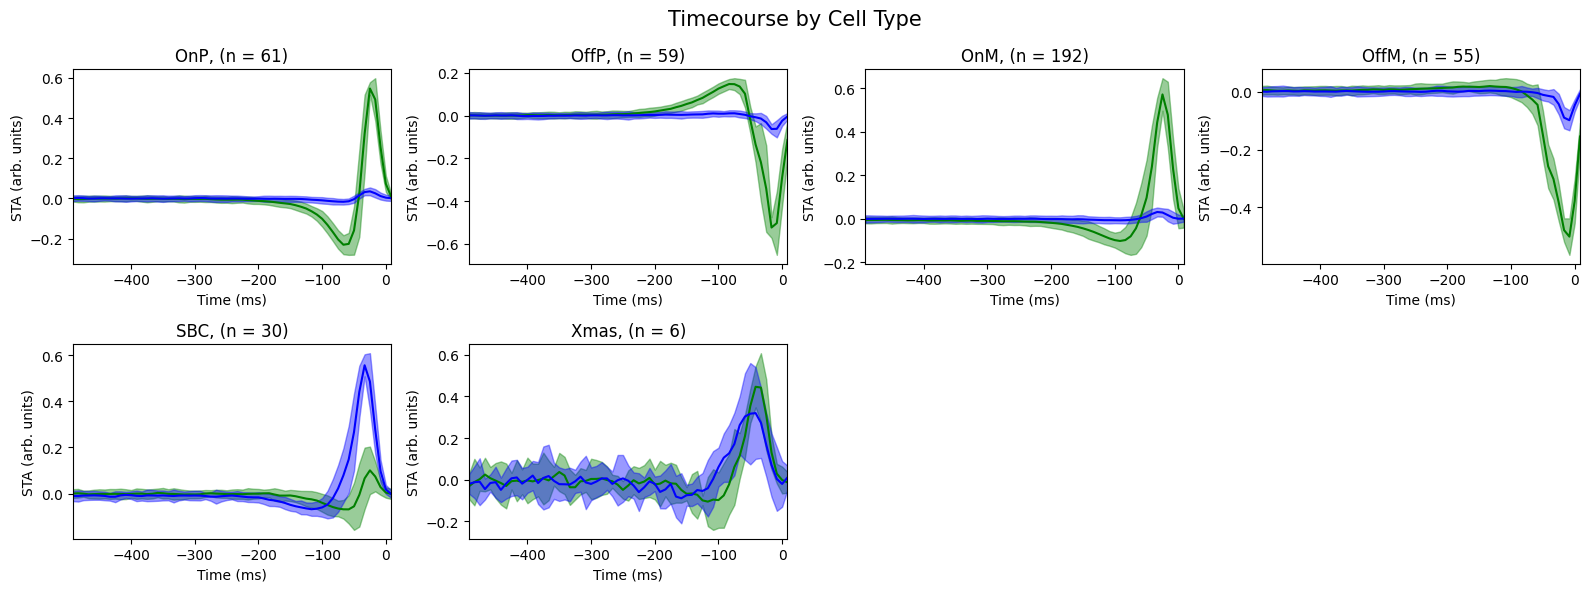

In [4]:
cell_types = ['OnP', 'OffP', 'OnM', 'OffM', 'SBC', 'Xmas']
rf_axes = pipeline.plot_rfs(cell_types = cell_types, units = 'pixels')
timecourse_axes = pipeline.plot_timecourses(cell_types = cell_types);

In [ ]:
epoch_params = ['imageOrder']
image_order = [lst for lst in stim.df_epochs['imageOrder']]
image_order = np.array(image_order)

images_per_epoch = stim.df_epochs.loc[0,'epoch_parameters']['imagesPerEpoch']
num_epochs = len(stim.df_epochs)

